Implementation of the classification model(s) and their validation (5 points) 
• A Jupyter Notebook using the Python programming language is required. 

In [37]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from skimage.io import imread, imshow
#from skimage.color import rgb2gray

Implementation for one og these models.
*clearly separating training and evaluation (using the train/test sets as deemed appropriate).*

Train and evaluate model - whit parametre classifer and the axes to the models.

In [5]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()

from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

def train_model(classifier, X_train, y_train):
    classifier.fit(X_train, y_train)

def evaluate_model(classifier, X_test, y_test):
    accuracy = classifier.score(X_test, y_test)
    return accuracy


In [25]:
# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
            labels.append(os.path.basename(folder))
    return np.array(images), np.array(labels)

# Define folder paths
folder_paths = {
    "AnnualCrop": "images/AnnualCrop",
    "Forest": "images/Forest",
    "HerbaceousVegetation": "images/HerbaceousVegetation",
    "Highway": "images/Highway",
    "Industrial": "images/Industrial",
    "Pasture": "images/Pasture",
    "PermanentCrop": "images/PermanentCrop",
    "Residential": "images/Residential",
    "River": "images/River",
    "SeaLake": "images/SeaLake"
}

# Load images from each folder
all_images = []
all_labels = []
for class_name, folder_path in folder_paths.items():
    print("Loading images from folder:", folder_path)
    images, labels = load_images_from_folder(folder_path)
    all_images.extend(images)
    all_labels.extend(labels)

# Convert to numpy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)



Loading images from folder: images/AnnualCrop
Loading images from folder: images/Forest
Loading images from folder: images/HerbaceousVegetation
Loading images from folder: images/Highway
Loading images from folder: images/Industrial
Loading images from folder: images/Pasture
Loading images from folder: images/PermanentCrop
Loading images from folder: images/Residential
Loading images from folder: images/River
Loading images from folder: images/SeaLake


FileNotFoundError: [Errno 2] No such file or directory: 'images\\AnnualCrop\\image2.jpg'

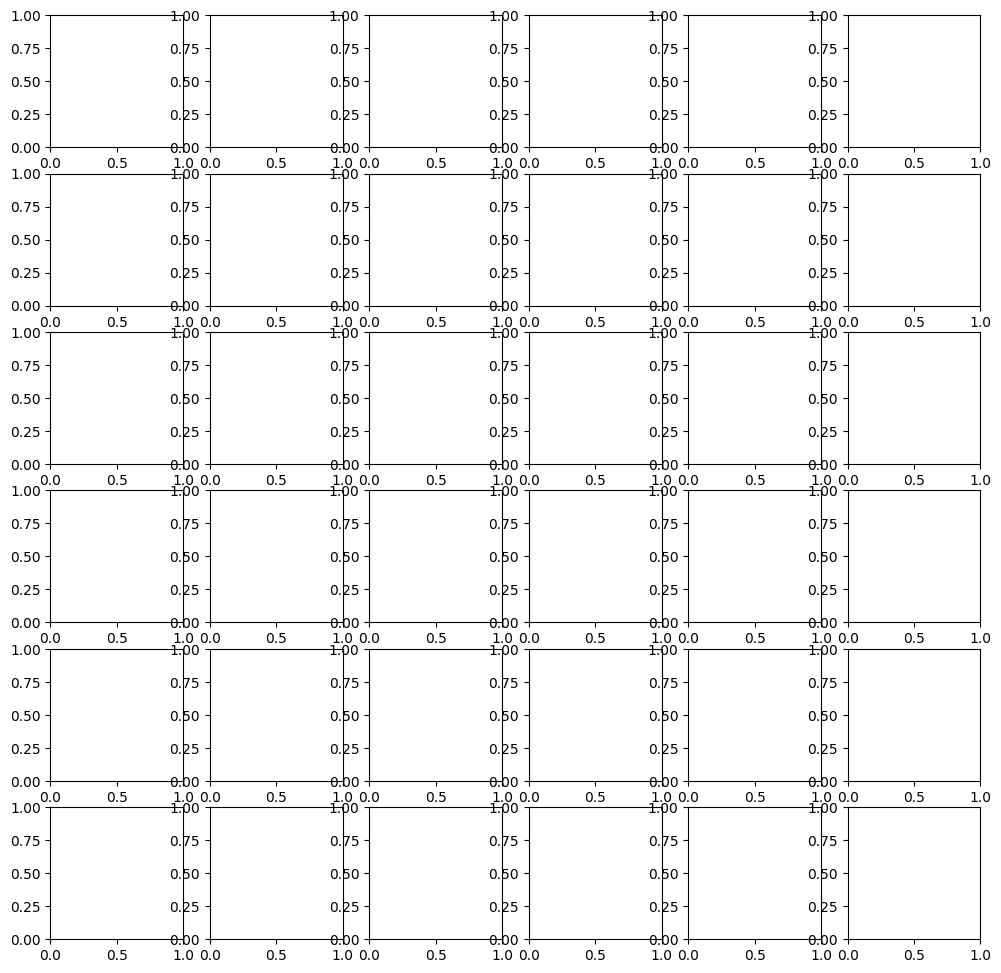

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import os

def display_images(class_name, folder_path, class_files):
    # Display 6x6 images from the given class_name
    plot_size = (6, 6)
    _, axs = plt.subplots(plot_size[0], plot_size[1], figsize=(12, 12))
    axs = axs.flatten()
    # Take an image sample
    # Assuming class_files is a dictionary containing image filenames for each class
    class_images = class_files[class_name]
    num_images = len(class_images)
    if num_images < plot_size[0] * plot_size[1]:
        print(f"Warning: Not enough images in class {class_name}. Displaying all available images.")
    im_sample = np.random.choice(class_images,
                                 size=min(plot_size[0] * plot_size[1], num_images),
                                 replace=False)
    imgs = []
    for im_file in im_sample:
        # Assuming imread is a function to read images
        im_path = os.path.join(folder_path, class_name, im_file)
        # Replace imread with the appropriate function to read images
        img = plt.imread(im_path)
        imgs.append(img)
    for img, ax in zip(imgs, axs):
        ax.imshow(img)
    plt.show()

# Assuming you have a dictionary containing image filenames for each class
class_files = {
    "AnnualCrop": ["image1.jpg", "image2.jpg", "image3.jpg", "image4.jpg", "image5.jpg"],
    "Forest": ["image6.jpg", "image7.jpg", "image8.jpg", "image9.jpg", "image10.jpg"],
    # Add other classes and their respective image filenames here
}

# Choose a class_name from the class_files dictionary
class_name = "AnnualCrop"  # Change this to the desired class name
# Assuming folder_path is the root folder where images are stored
folder_path = "images"  # Change this to the path of your image folder

# Call the function to display images from the specified class
display_images(class_name, folder_path, class_files)
